# Project 11 -- Lakulish Saini

**TA Help:** (for instance) John Smith, Alice Jones, etc., list names of any TAs who helped you

- For example: Help with figuring out how to write a function (describe the tasks that they helped you with)

**Collaboration:** My Friend in CS, My Uncle, Another Student, etc., list names of any other people who helped you

(describe the tasks that they helped you with)
- For example: helped figuring out how to load the dataset.
- Another example: helped debug error with my plot.

**Internet Resources:** Stack Exchange, Stack Overflow, etc.

(describe any information that you learned from internet resources, including the URLs)
- data frames in Pandas versus R from StackOverflow  https://stackoverflow.com/questions/8991709/why-were-pandas-merges-in-python-faster-than-data-table-merges-in-r-in-2012

**ChatGPT, Gemini, Claude, etc:** Any language models or generative AI chatbots that helped you.

(if you used any such tools, please tell us here)
- For example:  I asked ChatGPT how to define a new data frames
- Another example:  Gemini told me how to make a function for sorting my data

- ***Link to AI Chat History***: Please share a link to your chat if you used AI (ex. ChatGPT Shared Links)
**OVERALL MESSAGE:** Any time that you used anything except your brain to solve the questions in these projects, you need to disclose such resources at the start of the project, with details about your usage of the tools.

**YOUR OWN WORK:** Even when you utilize other resources, do NOT just copy and paste.  Write all explanations in your own words, using several sentences in English, which are understandable and which you wrote (and did not just copy and paste).

## Question 1

In [5]:
library(dplyr)
library(ggplot2)

In [22]:
myDF <- read.csv("/anvil/projects/tdm/data/zillow/State_time_series.csv")
head(myDF)
str(myDF[, c("RegionName", "DaysOnZillow_AllHomes")])

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1996-04-30,Alabama,NA,NA,NA,NA,NA,NA,NA,NA,...,45600,99500,79500,79000,140200,NA,NA,NA,NA,NA
2,1996-04-30,Arizona,NA,NA,NA,NA,NA,NA,NA,NA,...,67100,78900,103600,107500,168700,NA,NA,NA,NA,NA
3,1996-04-30,Arkansas,NA,NA,NA,NA,NA,NA,NA,NA,...,38400,70300,64400,64500,115200,NA,NA,NA,NA,NA
4,1996-04-30,California,NA,NA,NA,NA,NA,NA,NA,NA,...,95100,136100,157900,162000,270600,NA,NA,NA,NA,NA
5,1996-04-30,Colorado,NA,NA,NA,NA,NA,NA,NA,NA,...,82700,99400,128100,133600,209300,NA,NA,NA,NA,NA
6,1996-04-30,Connecticut,NA,NA,NA,NA,NA,NA,NA,NA,...,83700,85000,132000,141000,231600,NA,NA,NA,NA,NA


'data.frame':	13212 obs. of  2 variables:
 $ RegionName           : chr  "Alabama" "Arizona" "Arkansas" "California" ...
 $ DaysOnZillow_AllHomes: num  NA NA NA NA NA NA NA NA NA NA ...


In [30]:
z_clean <- myDF %>%
  filter(!is.na(RegionName),
         !is.na(DaysOnZillow_AllHomes))
head(z_clean)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2010-01-31,Alabama,169,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,67900,137300,123800,123300,232500,NA,NA,NA,NA,NA
2,2010-01-31,Alaska,130,3477,2748,182.0312,163.35188,154.22483,144.43942,125.41806,...,177200,176100,247200,257100,356200,NA,NA,NA,NA,NA
3,2010-01-31,Arizona,112,50221,50480,NA,NA,NA,NA,NA,...,95700,121800,161300,168600,298400,NA,NA,NA,NA,NA
4,2010-01-31,Arkansas,121,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,59200,127500,105800,105800,185100,NA,NA,NA,NA,NA
5,2010-01-31,California,108,138652,132194,NA,NA,NA,NA,NA,...,163600,313600,335100,340000,655700,NA,NA,NA,NA,NA
6,2010-01-31,Colorado,142,46680,41554,209.7378,157.98713,145.83333,153.84615,173.55633,...,130000,155700,215600,225100,388300,NA,NA,NA,NA,NA


In [40]:
n_distinct(z_clean$RegionName)

[1] 51

In [47]:
head(z_clean[, c("RegionName", "DaysOnZillow_AllHomes")])

,RegionName,DaysOnZillow_AllHomes
,<chr>,<dbl>
1,Alabama,169
2,Alaska,130
3,Arizona,112
4,Arkansas,121
5,California,108
6,Colorado,142


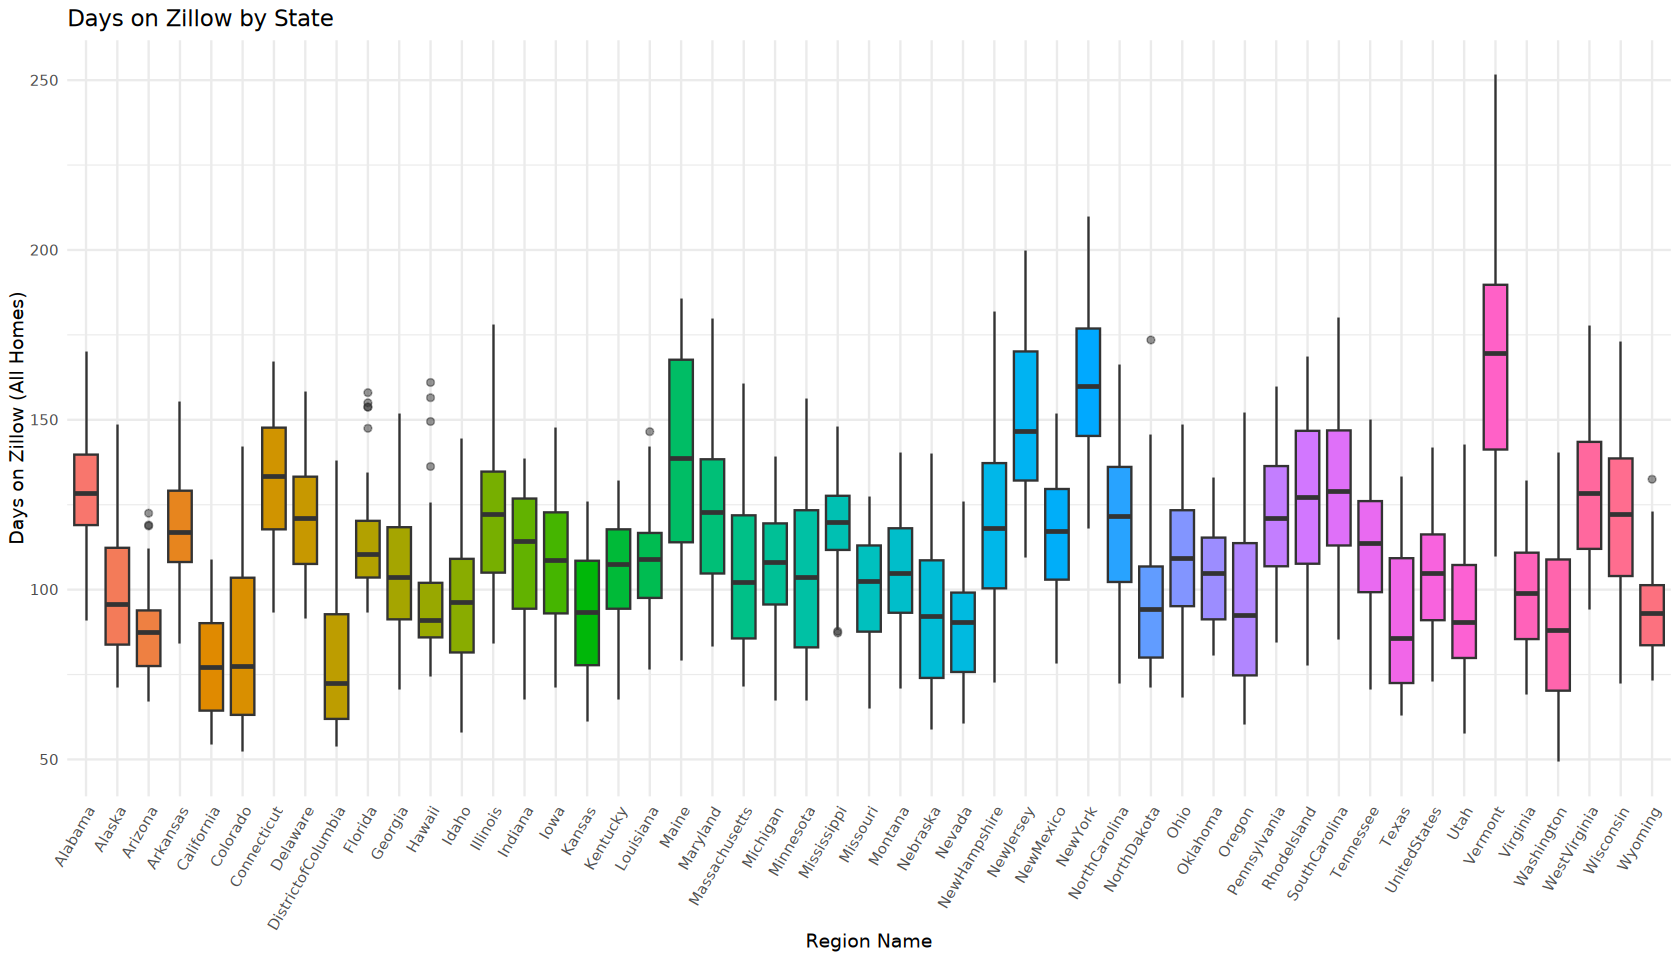

In [60]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(z_clean, aes(x = RegionName, y = DaysOnZillow_AllHomes, fill = RegionName)) +
  geom_boxplot(outlier.alpha = 0.5) +
  labs(title = "Days on Zillow by State",
       x = "Region Name",
       y = "Days on Zillow (All Homes)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 60, hjust = 1),
        legend.position = "none")

In [62]:
the_northeast <- c("Connecticut","Maine","Massachusetts","NewHampshire",
                   "NewJersey","NewYork","Pennsylvania","RhodeIsland","Vermont")

In [64]:
the_midwest <- c("Illinois","Indiana","Iowa","Kansas","Michigan","Minnesota",
                 "Missouri","Nebraska","NorthDakota","Ohio","Wisconsin")

In [68]:
the_south <- c("Alabama","Arkansas","Delaware","DistrictofColumbia","Florida",
               "Georgia","Kentucky","Louisiana","Maryland","Mississippi",
               "NorthCarolina","Oklahoma","SouthCarolina","Tennessee","Texas",
               "Virginia","WestVirginia")

In [70]:
the_west <- c("Alaska","Arizona","California","Colorado","Hawaii","Idaho",
              "Montana","Nevada","NewMexico","Oregon","Utah","Washington","Wyoming")

In [82]:
z_regions <- z_clean %>%
  mutate(USRegion = case_when(
    RegionName %in% the_northeast ~ "Northeast",
    RegionName %in% the_midwest   ~ "Midwest",
    RegionName %in% the_south     ~ "South",
    RegionName %in% the_west      ~ "West",
    TRUE ~ "Other"
  ))
head(z_regions[, c("RegionName", "USRegion", "DaysOnZillow_AllHomes")])

,RegionName,USRegion,DaysOnZillow_AllHomes
,<chr>,<chr>,<dbl>
1,Alabama,South,169
2,Alaska,West,130
3,Arizona,West,112
4,Arkansas,South,121
5,California,West,108
6,Colorado,West,142


In [95]:
z_regions %>% count(USRegion)

USRegion,n
<chr>,<int>
Midwest,1045
Northeast,855
Other,95
South,1615
West,1235


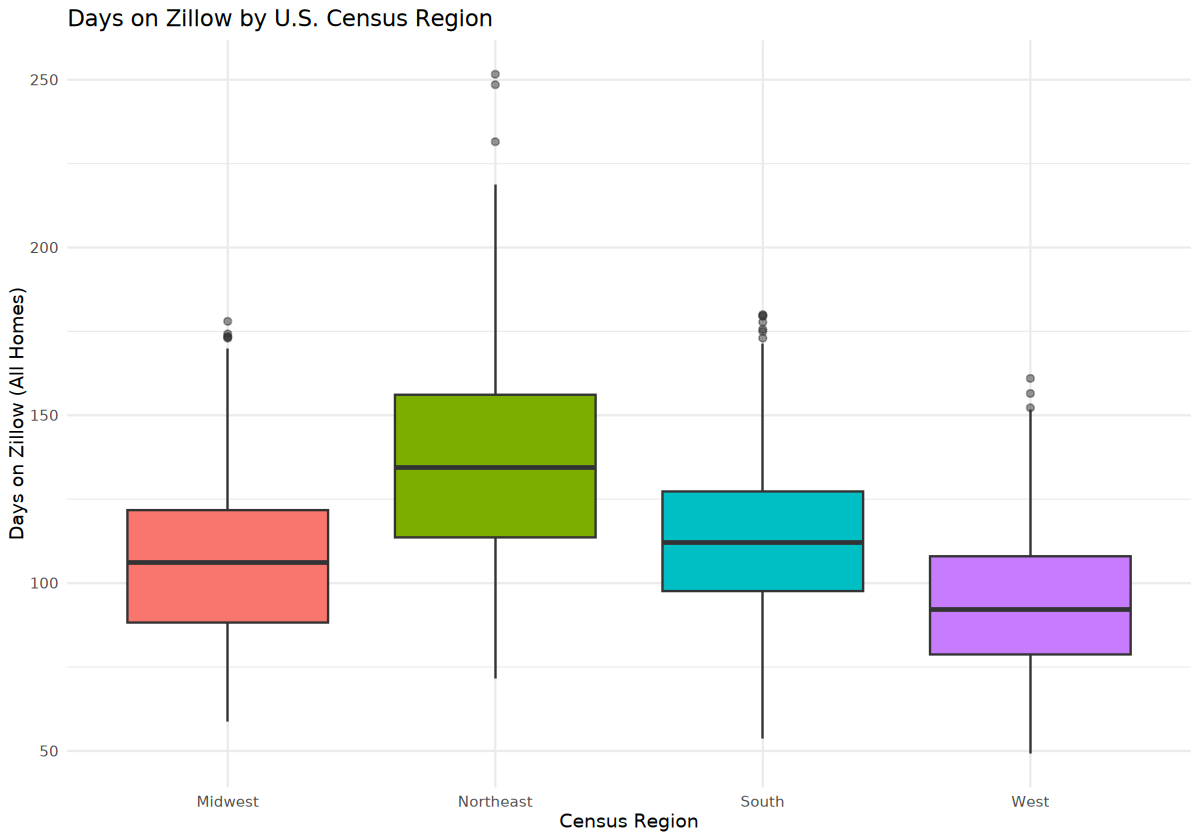

In [101]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(z_regions %>% filter(USRegion != "Other"),
       aes(x = USRegion, y = DaysOnZillow_AllHomes, fill = USRegion)) +
  geom_boxplot(outlier.alpha = 0.5) +
  labs(title = "Days on Zillow by U.S. Census Region",
       x = "Census Region",
       y = "Days on Zillow (All Homes)") +
  theme_minimal() +
  theme(legend.position = "none")

The all-states boxplot indicates a wide range of variation and a number of extreme outliers, but is hard to read since there are over fifty state labels on the x-axis. The visualization is much more understandable when the data is grouped by Census region and brings out larger trends. The South has more medians and ranges, which means that houses are more likely to remain on the market and have a greater variation in the length of listing. On the contrary, the Northeast and the West show tighter clusters, which imply quicker and more stable markets. The causes of these differences could be regional factors that include housing demand, population size, and the general economic conditions.

## Question 2

In [106]:
zillow <- read.csv("/anvil/projects/tdm/data/zillow/State_time_series.csv")

In [112]:
head(zillow[, c("RegionName", "DaysOnZillow_AllHomes", "InventoryRaw_AllHomes")])

,RegionName,DaysOnZillow_AllHomes,InventoryRaw_AllHomes
,<chr>,<dbl>,<int>
1,Alabama,NA,NA
2,Arizona,NA,NA
3,Arkansas,NA,NA
4,California,NA,NA
5,Colorado,NA,NA
6,Connecticut,NA,NA


In [117]:
z_clean <- zillow %>%
  filter(!is.na(RegionName),
         !is.na(DaysOnZillow_AllHomes),
         !is.na(InventoryRaw_AllHomes))
head(z_clean)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2010-01-31,Alabama,169,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,67900,137300,123800,123300,232500,NA,NA,NA,NA,NA
2,2010-01-31,Alaska,130,3477,2748,182.0312,163.35188,154.22483,144.43942,125.41806,...,177200,176100,247200,257100,356200,NA,NA,NA,NA,NA
3,2010-01-31,Arizona,112,50221,50480,NA,NA,NA,NA,NA,...,95700,121800,161300,168600,298400,NA,NA,NA,NA,NA
4,2010-01-31,Arkansas,121,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,59200,127500,105800,105800,185100,NA,NA,NA,NA,NA
5,2010-01-31,California,108,138652,132194,NA,NA,NA,NA,NA,...,163600,313600,335100,340000,655700,NA,NA,NA,NA,NA
6,2010-01-31,Colorado,142,46680,41554,209.7378,157.98713,145.83333,153.84615,173.55633,...,130000,155700,215600,225100,388300,NA,NA,NA,NA,NA


In [122]:
the_northeast <- c("Connecticut","Maine","Massachusetts","NewHampshire",
                   "NewJersey","NewYork","Pennsylvania","RhodeIsland","Vermont")

In [125]:
the_midwest <- c("Illinois","Indiana","Iowa","Kansas","Michigan","Minnesota",
                 "Missouri","Nebraska","NorthDakota","Ohio","Wisconsin")

In [130]:
the_south <- c("Alabama","Arkansas","Delaware","DistrictofColumbia","Florida",
               "Georgia","Kentucky","Louisiana","Maryland","Mississippi",
               "NorthCarolina","Oklahoma","SouthCarolina","Tennessee","Texas",
               "Virginia","WestVirginia")

In [135]:
the_west <- c("Alaska","Arizona","California","Colorado","Hawaii","Idaho",
              "Montana","Nevada","NewMexico","Oregon","Utah","Washington","Wyoming")

In [138]:
z_clean <- z_clean %>%
  mutate(NewRegions = case_when(
    RegionName %in% the_northeast ~ "Northeast",
    RegionName %in% the_midwest   ~ "Midwest",
    RegionName %in% the_south     ~ "South",
    RegionName %in% the_west      ~ "West",
    TRUE ~ "Other"
  ))

In [142]:
head(z_clean[, c("RegionName", "NewRegions", "DaysOnZillow_AllHomes", "InventoryRaw_AllHomes")])

,RegionName,NewRegions,DaysOnZillow_AllHomes,InventoryRaw_AllHomes
,<chr>,<chr>,<dbl>,<int>
1,Alabama,South,169,29765
2,Alaska,West,130,2748
3,Arizona,West,112,50480
4,Arkansas,South,121,17418
5,California,West,108,132194
6,Colorado,West,142,41554


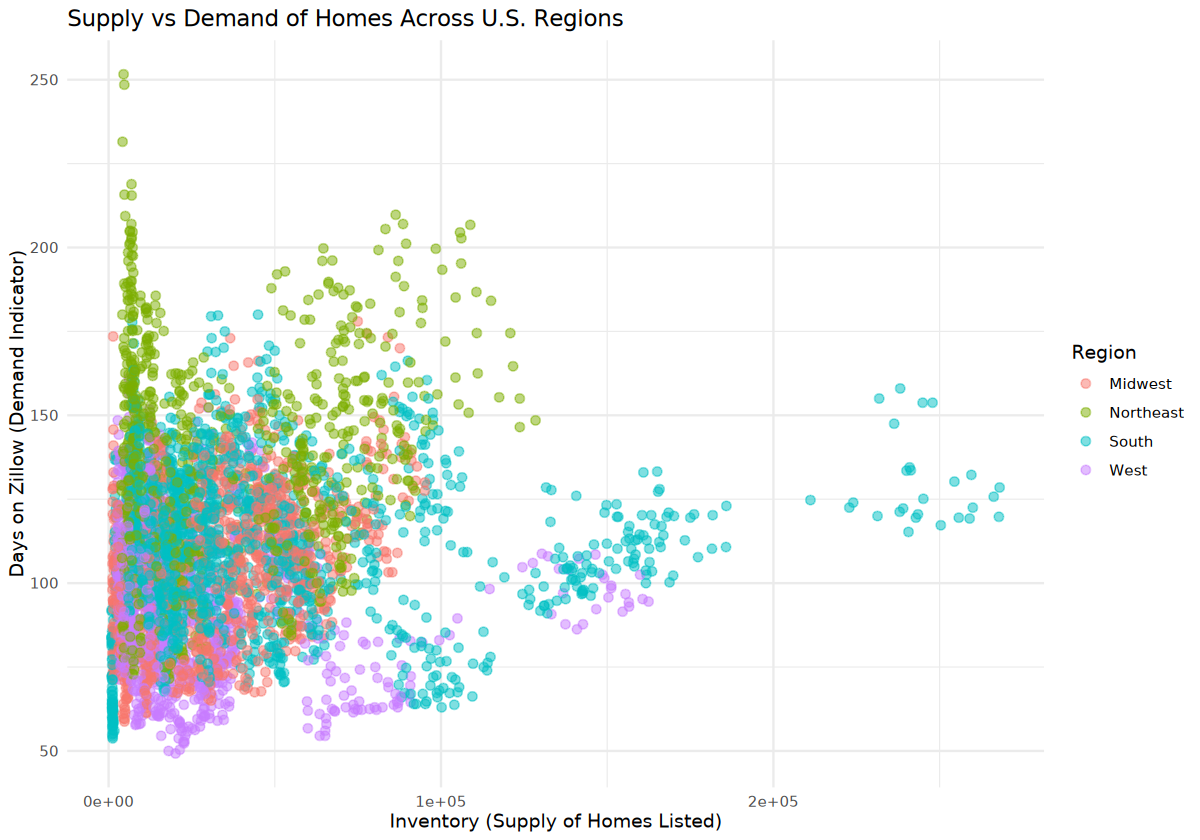

In [146]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(z_clean, aes(x = InventoryRaw_AllHomes,
                    y = DaysOnZillow_AllHomes,
                    color = NewRegions)) +
  geom_point(alpha = 0.5, size = 2) +
  labs(title = "Supply vs Demand of Homes Across U.S. Regions",
       x = "Inventory (Supply of Homes Listed)",
       y = "Days on Zillow (Demand Indicator)",
       color = "Region") +
  theme_minimal()

2.1: This scatterplot shows market supply on the x-axis and time-to-sell (demand) on the y-axis. It excludes “Other” regions because those entries don’t really belong to the four official census groups that were defined.

In [178]:
library(patchwork)

In [182]:
p_midwest <- ggplot(z_clean %>% filter(NewRegions == "Midwest"),
                    aes(x = InventoryRaw_AllHomes, y = DaysOnZillow_AllHomes)) +
  geom_point(color = "#1f77b4", alpha = 0.5) +
  labs(title = "Midwest Region",
       x = "Inventory",
       y = "Days on Zillow") +
  theme_minimal()

In [185]:
p_south <- ggplot(z_clean %>% filter(NewRegions == "South"),
                  aes(x = InventoryRaw_AllHomes, y = DaysOnZillow_AllHomes)) +
  geom_point(color = "#d62728", alpha = 0.5) +
  labs(title = "South Region",
       x = "Inventory",
       y = "Days on Zillow") +
  theme_minimal()

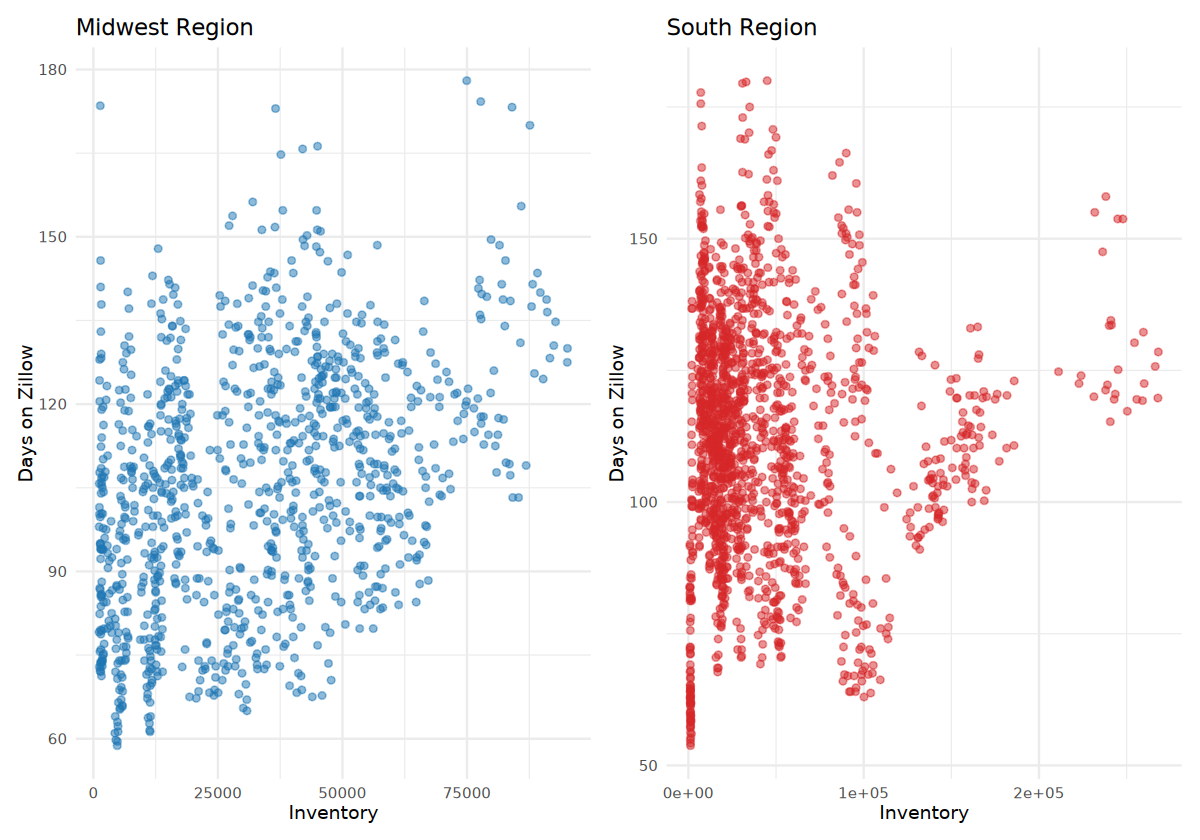

In [186]:
p_midwest + p_south

In [195]:
p_west <- ggplot(z_clean %>% filter(NewRegions == "West"),
                 aes(x = InventoryRaw_AllHomes, y = DaysOnZillow_AllHomes)) +
  geom_point(color = "#2ca02c", alpha = 0.5) +
  labs(title = "West Region",
       x = "Inventory",
       y = "Days on Zillow") +
  theme_minimal()

In [202]:
p_northeast <- ggplot(z_clean %>% filter(NewRegions == "Northeast"),
                      aes(x = InventoryRaw_AllHomes, y = DaysOnZillow_AllHomes)) +
  geom_point(color = "#9467bd", alpha = 0.5) +
  labs(title = "Northeast Region",
       x = "Inventory",
       y = "Days on Zillow") +
  theme_minimal()

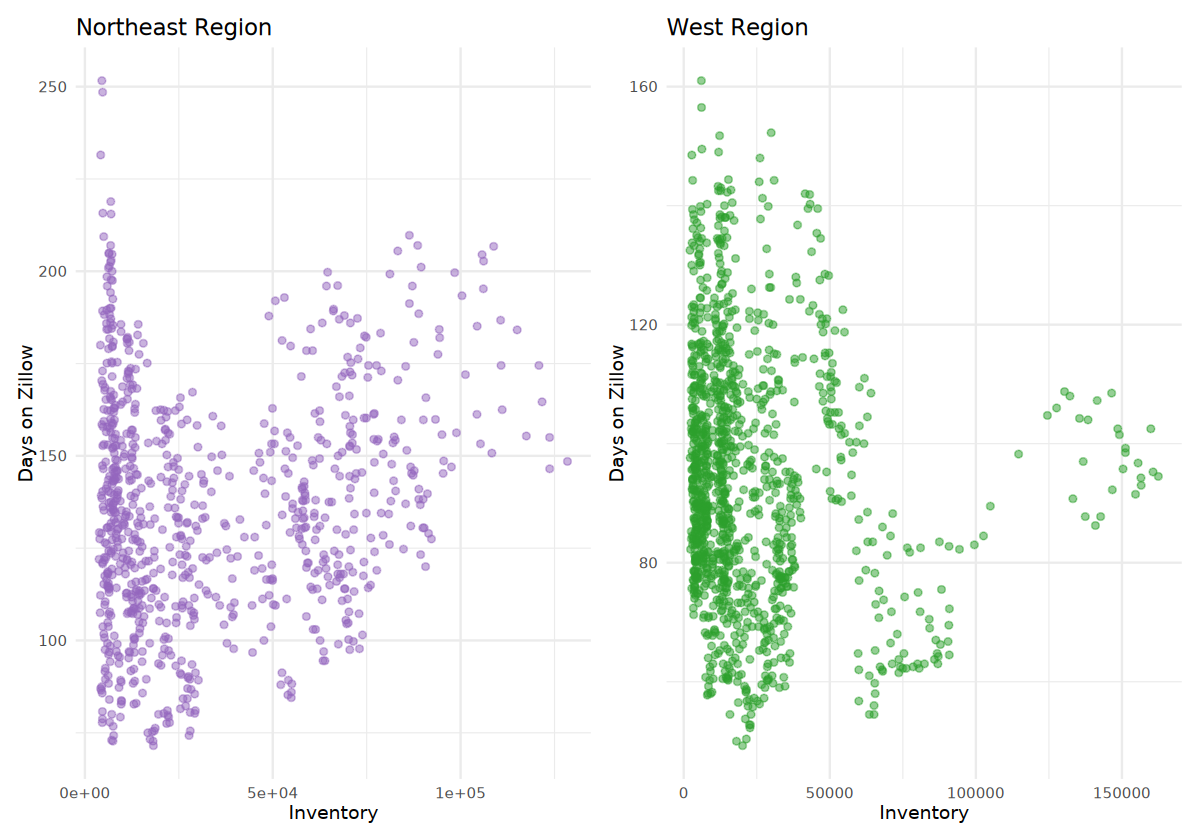

In [208]:
p_northeast + p_west

In [213]:
compare_regions <- z_clean %>%
  filter(NewRegions %in% c("Midwest", "South"))

In [219]:
head(compare_regions)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,NewRegions
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>
1,2010-01-31,Alabama,169.0,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,137300,123800,123300,232500,NA,NA,NA,NA,NA,South
2,2010-01-31,Arkansas,121.0,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,127500,105800,105800,185100,NA,NA,NA,NA,NA,South
3,2010-01-31,Delaware,137.5,6753,6215,NA,138.88889,133.28571,130.62500,149.46455,...,NA,212000,211200,327800,NA,NA,NA,NA,NA,South
4,2010-01-31,DistrictofColumbia,126.0,2128,1934,424.3814,NA,NA,NA,NA,...,351500,354600,366400,707500,NA,NA,NA,NA,NA,South
5,2010-01-31,Florida,158.0,232692,238138,NA,NA,NA,119.12895,164.97516,...,115500,145800,156200,291000,NA,NA,NA,NA,NA,South
6,2010-01-31,Georgia,152.0,93675,88378,157.4619,97.44268,89.13558,96.37482,110.94258,...,132900,135200,135400,255100,NA,NA,NA,NA,NA,South


In [223]:
options(repr.plot.width = 10, repr.plot.height = 7)

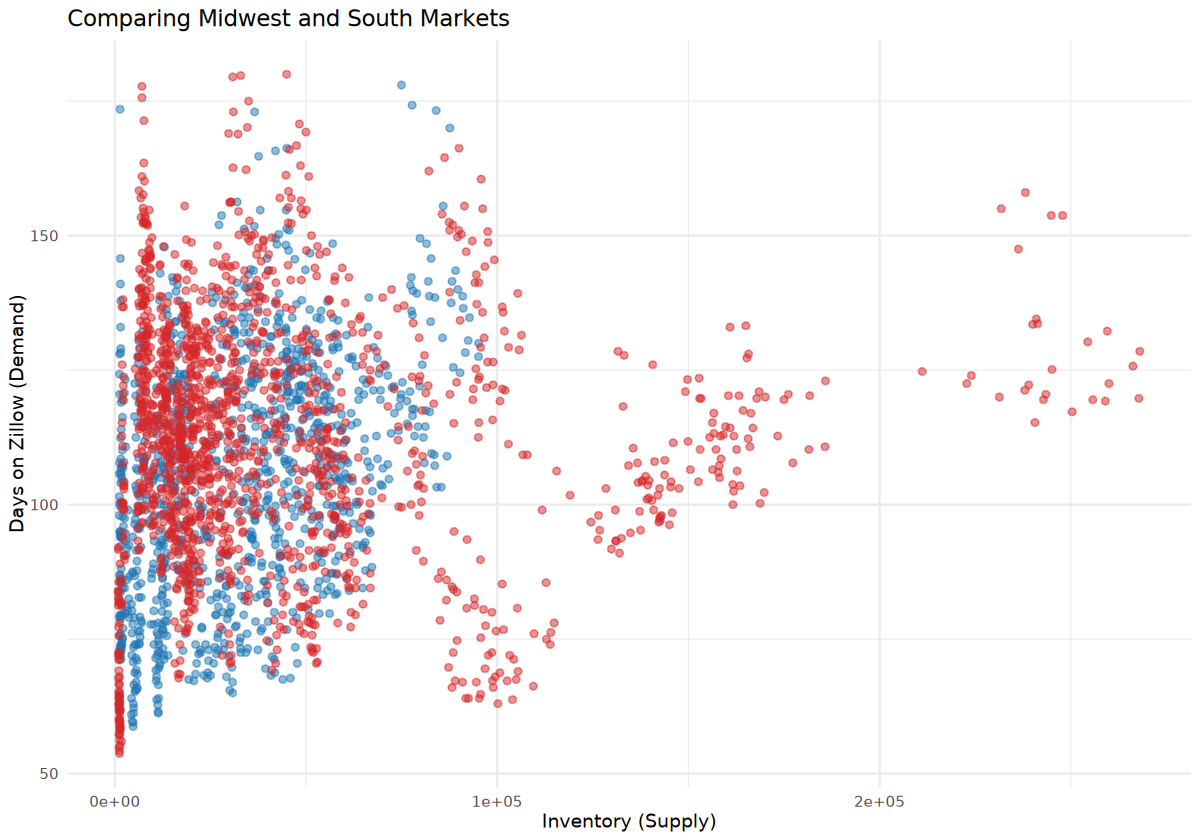

In [233]:
ggplot() +
  geom_point(data = compare_regions %>% filter(NewRegions == "Midwest"),
             aes(x = InventoryRaw_AllHomes, y = DaysOnZillow_AllHomes),
             color = "#1f77b4", alpha = 0.5) +
  geom_point(data = compare_regions %>% filter(NewRegions == "South"),
             aes(x = InventoryRaw_AllHomes, y = DaysOnZillow_AllHomes),
             color = "#d62728", alpha = 0.5) +
  labs(title = "Comparing Midwest and South Markets",
       x = "Inventory (Supply)",
       y = "Days on Zillow (Demand)") +
  theme_minimal()

As the scatterplot of inventory versus days on Zillow demonstrates, states with a greater inventory level have more listing duration range, whereas those with lower inventory have a faster sale. By color-coded by region, it is easy to see that the South is the highest in terms of the average days on market, whereas the West and Northeast exhibit narrow bands, which means that the markets are more active. These regional trends are easier to notice with the patchwork comparisons of the South and Midwest having more spread and outliers, with the points of the West region being more densely clustered. The fact that two areas are overlaid in a single plot further proves this difference: the South market seems to be slower and more diversified, whereas the Midwest is fairly balanced in terms of supply and demand.

## Question 3

In [236]:
library(dplyr)
library(ggplot2)
library(tidyr) 

In [242]:
myDF <- read.csv("/anvil/projects/tdm/data/flights/subset/1997.csv")
head(myDF)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,...,<int>,<int>,<int>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1997,1,28,2,1615,1615,1728,1725,WN,1159,...,4,9,0,NA,0,NA,NA,NA,NA,NA
2,1997,1,29,3,1624,1615,1735,1725,WN,1159,...,4,11,0,NA,0,NA,NA,NA,NA,NA
3,1997,1,30,4,1626,1615,1730,1725,WN,1159,...,2,10,0,NA,0,NA,NA,NA,NA,NA
4,1997,1,31,5,1628,1615,1729,1725,WN,1159,...,4,7,0,NA,0,NA,NA,NA,NA,NA
5,1997,1,14,2,1503,1425,1619,1535,WN,1221,...,4,8,0,NA,0,NA,NA,NA,NA,NA
6,1997,1,1,3,1029,1020,1127,1130,WN,1293,...,2,4,0,NA,0,NA,NA,NA,NA,NA


In [250]:
str(myDF[, c("Month", "DepDelay", "ArrDelay")])
colSums(is.na(myDF[, c("Month", "DepDelay", "ArrDelay")]))

'data.frame':	5411843 obs. of  3 variables:
 $ Month   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DepDelay: int  0 9 11 13 38 9 0 9 0 10 ...
 $ ArrDelay: int  3 10 5 4 44 -3 0 15 11 9 ...


Month DepDelay ArrDelay 
       0    97763   109844

In [255]:
myDF_clean <- myDF %>%
  filter(!is.na(DepDelay) & !is.na(ArrDelay))

In [262]:
head(myDF_clean[, c("Month", "DepDelay", "ArrDelay")])

,Month,DepDelay,ArrDelay
,<int>,<int>,<int>
1,1,0,3
2,1,9,10
3,1,11,5
4,1,13,4
5,1,38,44
6,1,9,-3


In [267]:
summaryDF <- myDF_clean %>%
  select(Month, DepDelay, ArrDelay) %>%
  pivot_longer(cols = c(DepDelay, ArrDelay),
               names_to = "DelayType",
               values_to = "DelayTime") %>%
  group_by(Month, DelayType) %>%
  summarise(
    mean = mean(DelayTime, na.rm = TRUE),
    high = mean(DelayTime, na.rm = TRUE) + sd(DelayTime, na.rm = TRUE),
    low  = mean(DelayTime, na.rm = TRUE) - sd(DelayTime, na.rm = TRUE),
    .groups = "drop"
  )

head(summaryDF)

Month,DelayType,mean,high,low
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,ArrDelay,12.290145,44.91143,-20.33114
1,DepDelay,11.802902,41.75187,-18.14607
2,ArrDelay,9.014008,38.75252,-20.72450
2,DepDelay,9.265771,37.47111,-18.93957
3,ArrDelay,7.311369,35.26029,-20.63756
3,DepDelay,8.433000,35.30937,-18.44337


In [271]:
options(repr.plot.width = 10, repr.plot.height = 7)

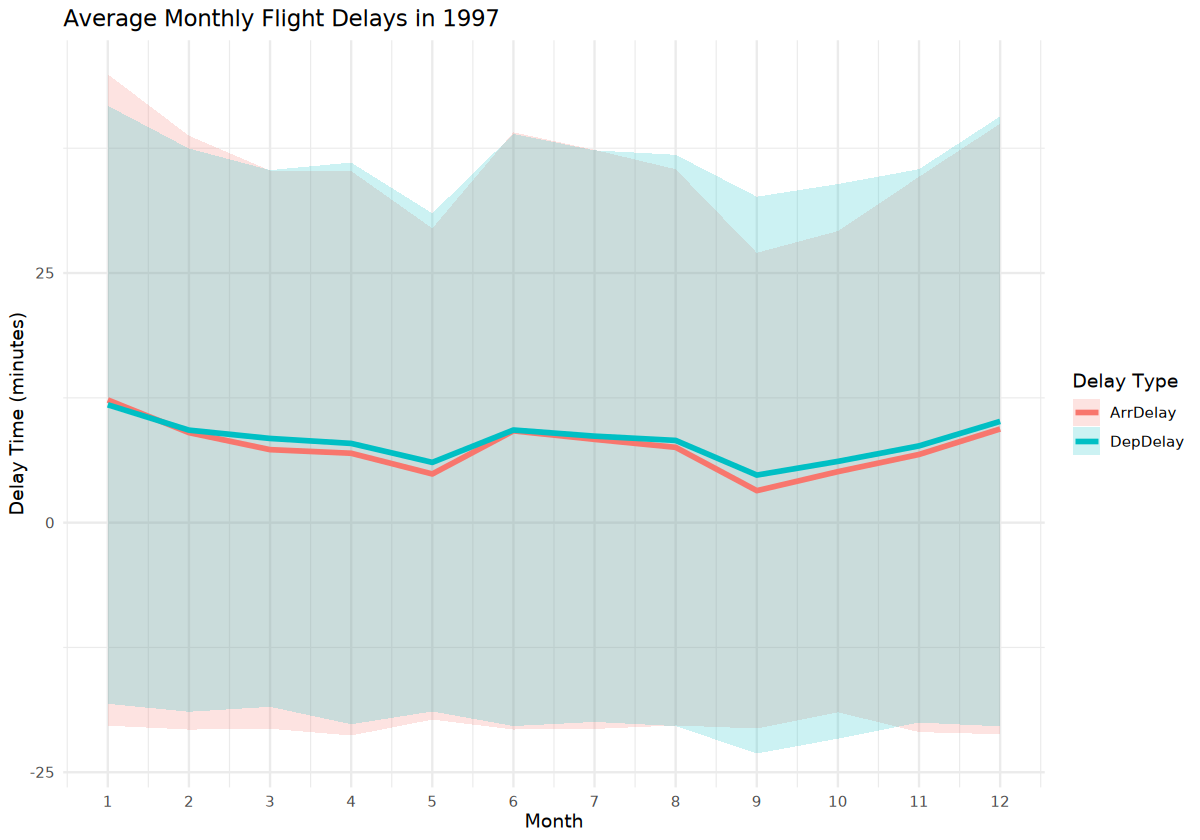

In [277]:
ggplot(summaryDF, aes(x = Month, y = mean, color = DelayType, fill = DelayType)) +
  geom_ribbon(aes(ymin = low, ymax = high), alpha = 0.2, color = NA) +
  geom_line(size = 1.2) +
  labs(title = "Average Monthly Flight Delays in 1997",
       x = "Month",
       y = "Delay Time (minutes)",
       color = "Delay Type",
       fill = "Delay Type") +
  scale_x_continuous(breaks = 1:12) +
  theme_minimal()

In [282]:
summary(summaryDF$mean)
table(summaryDF$DelayType)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.205   6.657   8.085   7.851   9.209  12.290 


ArrDelay DepDelay 
      12       12 

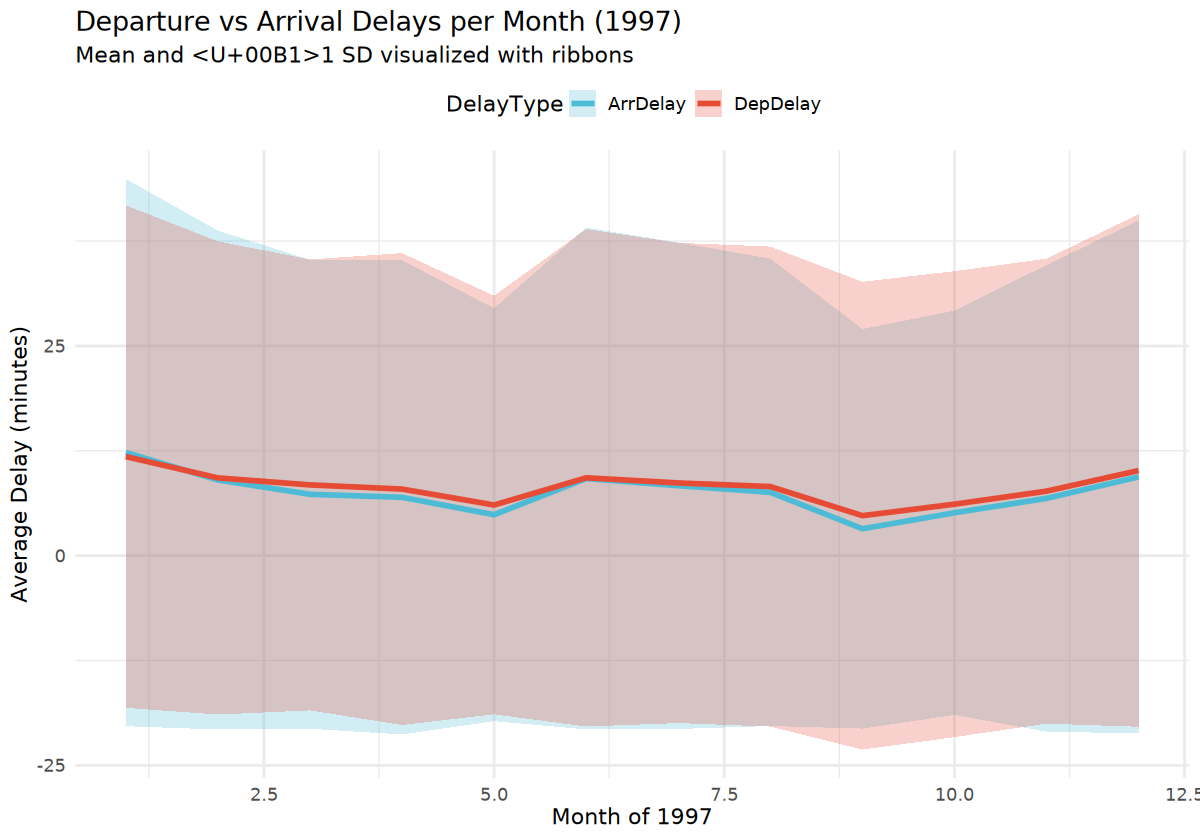

In [288]:
ggplot(summaryDF, aes(x = Month, y = mean, color = DelayType, fill = DelayType)) +
  geom_ribbon(aes(ymin = low, ymax = high), alpha = 0.25, color = NA) +
  geom_line(linewidth = 1.2) +
  scale_color_manual(values = c("DepDelay" = "#E64B35", "ArrDelay" = "#4DBBD5")) +
  scale_fill_manual(values = c("DepDelay" = "#E64B35", "ArrDelay" = "#4DBBD5")) +
  labs(title = "Departure vs Arrival Delays per Month (1997)",
       subtitle = "Mean and ±1 SD visualized with ribbons",
       x = "Month of 1997",
       y = "Average Delay (minutes)") +
  theme_minimal(base_size = 13) +
  theme(legend.position = "top")

The summaryDF data shows the monthly average departure and arrival delays. The entries reflect a particular month and type of delay and reflect the mean delay time and the upper and lower limits according to one standard deviation above and below the mean.

The new summaryDF dataset summarizes the departure and arrival delays by month with the average values and variation of the same. The resulting ribbon plot illustrates that the two types of delays tend to follow the same monthly trend, that is, they are highest in the summer months (June to August) and to a small extent in December, which is probably due to high travel demand and weather factors. The departure delays are more variable and slightly higher than the arrival delays as indicated by the broader red ribbon. The colored bands of +-1 standard deviation provide an idea of the inconsistency of the flight times on a monthly basis, and it can be seen that the variability in delays is higher during the peak times of travel.

## Question 4

In [15]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(patchwork)

In [4]:
flights <- read.csv("/anvil/projects/tdm/data/flights/subset/1997.csv")
head(flights)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,...,<int>,<int>,<int>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1997,1,28,2,1615,1615,1728,1725,WN,1159,...,4,9,0,NA,0,NA,NA,NA,NA,NA
2,1997,1,29,3,1624,1615,1735,1725,WN,1159,...,4,11,0,NA,0,NA,NA,NA,NA,NA
3,1997,1,30,4,1626,1615,1730,1725,WN,1159,...,2,10,0,NA,0,NA,NA,NA,NA,NA
4,1997,1,31,5,1628,1615,1729,1725,WN,1159,...,4,7,0,NA,0,NA,NA,NA,NA,NA
5,1997,1,14,2,1503,1425,1619,1535,WN,1221,...,4,8,0,NA,0,NA,NA,NA,NA,NA
6,1997,1,1,3,1029,1020,1127,1130,WN,1293,...,2,4,0,NA,0,NA,NA,NA,NA,NA


In [21]:
phx_flights <- flights %>%
  filter(Origin == "PHX") %>%
  select(Month, DepDelay, ArrDelay)

head(phx_flights)

,Month,DepDelay,ArrDelay
,<int>,<int>,<int>
1,1,1,33
2,1,9,16
3,1,10,2
4,1,26,14
5,1,19,-9
6,1,63,44


In [28]:
colSums(is.na(phx_flights))

Month DepDelay ArrDelay 
       0     2088     2373

In [39]:
phx_clean <- phx_flights %>%
  filter(!is.na(DepDelay) & !is.na(ArrDelay))

In [49]:
head(phx_clean)

,Month,DepDelay,ArrDelay
,<int>,<int>,<int>
1,1,1,33
2,1,9,16
3,1,10,2
4,1,26,14
5,1,19,-9
6,1,63,44


In [61]:
phx_summary <- phx_clean %>%
  pivot_longer(cols = c(DepDelay, ArrDelay),
               names_to = "DelayType",
               values_to = "DelayTime") %>%
  group_by(Month, DelayType) %>%
  summarise(
    mean = mean(DelayTime, na.rm = TRUE),
    high = mean(DelayTime, na.rm = TRUE) + sd(DelayTime, na.rm = TRUE),
    low  = mean(DelayTime, na.rm = TRUE) - sd(DelayTime, na.rm = TRUE),
    .groups = "drop"
  )

In [75]:
head(phx_summary)

Month,DelayType,mean,high,low
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,ArrDelay,15.117471,43.64623,-13.41129
1,DepDelay,13.264948,40.27700,-13.74710
2,ArrDelay,8.484214,34.30513,-17.33670
2,DepDelay,8.659633,32.83881,-15.51955
3,ArrDelay,8.113671,30.61207,-14.38473
3,DepDelay,7.849375,28.65286,-12.95411


In [87]:
p_dep <- ggplot(phx_summary %>% filter(DelayType == "DepDelay"),
                aes(x = Month, y = mean)) +
  geom_ribbon(aes(ymin = low, ymax = high), fill = "#E64B35", alpha = 0.2) +
  geom_line(color = "#E64B35", linewidth = 1.2) +
  labs(title = "Phoenix (PHX) Departure Delays - 1997",
       x = "Month",
       y = "Average Delay (minutes)") +
  scale_x_continuous(breaks = 1:12) +
  theme_minimal()
head(p_dep)

Month,DelayType,mean,high,low
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,DepDelay,13.264948,40.27700,-13.74710
2,DepDelay,8.659633,32.83881,-15.51955
3,DepDelay,7.849375,28.65286,-12.95411
4,DepDelay,8.655436,31.91716,-14.60629
5,DepDelay,6.647190,27.04453,-13.75015
6,DepDelay,7.317884,27.16613,-12.53037
7,DepDelay,7.371875,28.78702,-14.04327
8,DepDelay,9.567615,34.12043,-14.98520
9,DepDelay,4.922294,24.50544,-14.66086


In [115]:
p_arr <- ggplot(phx_summary %>% filter(DelayType == "ArrDelay"),
                aes(x = Month, y = mean)) +
  geom_ribbon(aes(ymin = low, ymax = high), fill = "#4DBBD5", alpha = 0.2) +
  geom_line(color = "#4DBBD5", linewidth = 1.2) +
  labs(title = "Phoenix (PHX) Arrival Delays - 1997",
       x = "Month",
       y = "Average Delay (minutes)") +
  scale_x_continuous(breaks = 1:12) +
  theme_minimal()
head(p_arr)

Month,DelayType,mean,high,low
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,ArrDelay,15.117471,43.64623,-13.41129
2,ArrDelay,8.484214,34.30513,-17.33670
3,ArrDelay,8.113671,30.61207,-14.38473
4,ArrDelay,9.294135,34.09239,-15.50412
5,ArrDelay,6.977577,28.65703,-14.70188
6,ArrDelay,7.055589,28.40464,-14.29347
7,ArrDelay,6.732548,29.42897,-15.96388
8,ArrDelay,9.342184,35.25479,-16.57042
9,ArrDelay,4.103756,25.76388,-17.55637


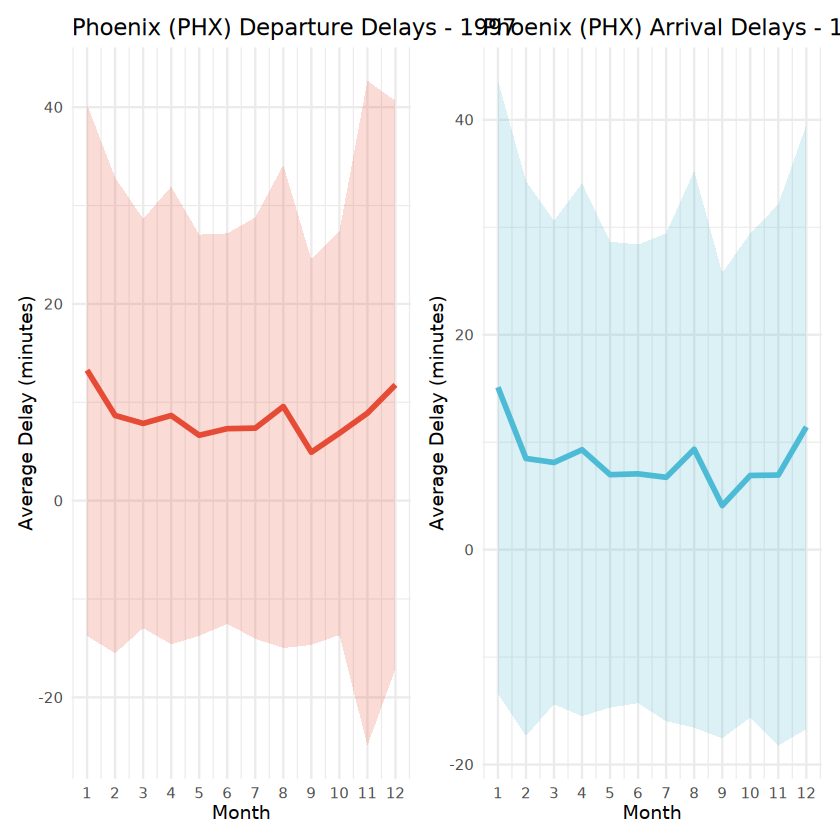

In [119]:
(p_dep + p_arr)

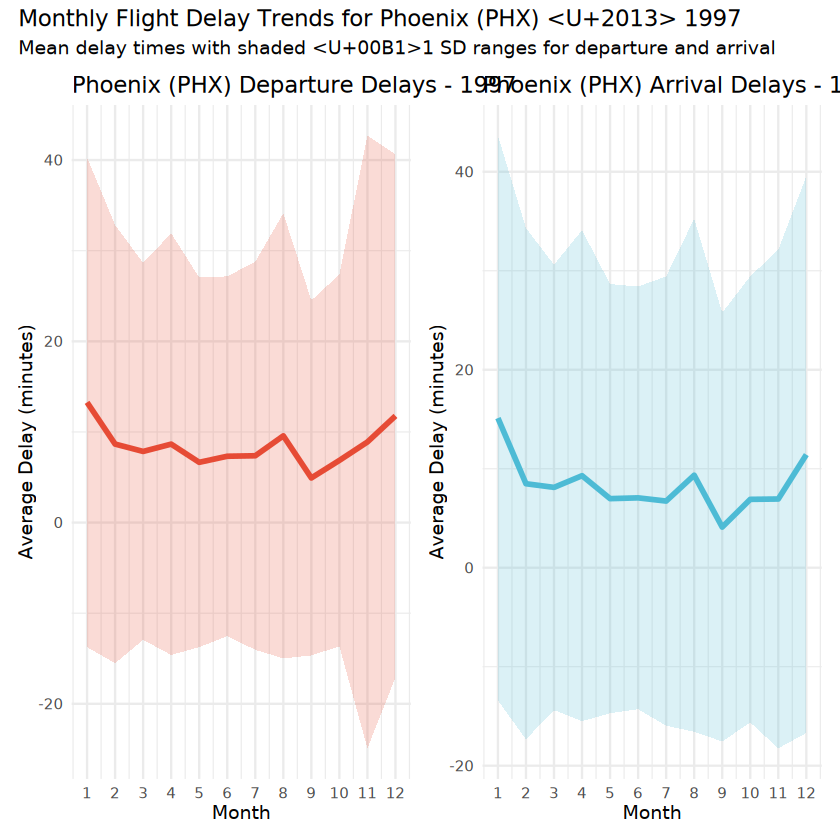

In [124]:
(p_dep + p_arr) +
  plot_annotation(
    title = "Monthly Flight Delay Trends for Phoenix (PHX) – 1997",
    subtitle = "Mean delay times with shaded ±1 SD ranges for departure and arrival"
  )

In [139]:
summary(phx_summary$mean)
table(phx_summary$DelayType)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.104   6.931   7.982   8.428   9.306  15.117 


ArrDelay DepDelay 
      12       12 

According to the plots of the Phoenix (PHX) delays, departments and arrivals have both delays that follow similar patterns in the 1997 pattern with peaks in the mid-summer and once more in the month of December. Departure delays are always greater and more fluctuate particularly during the hot season that might indicate weather-related delays or heavy seasonal traffic. Arrival delays are more predictable, implying that whereas PHX has congestion on takeoff, there is a tendency of the flights to regain time in the air. All in all, the stippled ribbons (±1 SD) make it obvious of the months where the unpredictable delays are the strongest, with July and December being the most susceptible months when considering the travel out of Phoenix.

## Question 5

In [309]:
library(dplyr)
library(ggplot2)

In [315]:
z_state <- read.csv("/anvil/projects/tdm/data/zillow/State_time_series.csv")
head(z_state)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1996-04-30,Alabama,NA,NA,NA,NA,NA,NA,NA,NA,...,45600,99500,79500,79000,140200,NA,NA,NA,NA,NA
2,1996-04-30,Arizona,NA,NA,NA,NA,NA,NA,NA,NA,...,67100,78900,103600,107500,168700,NA,NA,NA,NA,NA
3,1996-04-30,Arkansas,NA,NA,NA,NA,NA,NA,NA,NA,...,38400,70300,64400,64500,115200,NA,NA,NA,NA,NA
4,1996-04-30,California,NA,NA,NA,NA,NA,NA,NA,NA,...,95100,136100,157900,162000,270600,NA,NA,NA,NA,NA
5,1996-04-30,Colorado,NA,NA,NA,NA,NA,NA,NA,NA,...,82700,99400,128100,133600,209300,NA,NA,NA,NA,NA
6,1996-04-30,Connecticut,NA,NA,NA,NA,NA,NA,NA,NA,...,83700,85000,132000,141000,231600,NA,NA,NA,NA,NA


In [322]:
z_state_clean <- z_state %>%
  filter(!is.na(Date),
         !is.na(MedianListingPrice_AllHomes),
         !is.na(RegionName))
head(z_state_clean)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2010-01-31,Alabama,169.0,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,67900,137300,123800,123300,232500,NA,NA,NA,NA,NA
2,2010-01-31,Alaska,130.0,3477,2748,182.0312,163.35188,154.22483,144.43942,125.41806,...,177200,176100,247200,257100,356200,NA,NA,NA,NA,NA
3,2010-01-31,Arkansas,121.0,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,59200,127500,105800,105800,185100,NA,NA,NA,NA,NA
4,2010-01-31,Colorado,142.0,46680,41554,209.7378,157.98713,145.83333,153.84615,173.55633,...,130000,155700,215600,225100,388300,NA,NA,NA,NA,NA
5,2010-01-31,Delaware,137.5,6753,6215,NA,138.88889,133.28571,130.62500,149.46455,...,141400,NA,212000,211200,327800,NA,NA,NA,NA,NA
6,2010-01-31,DistrictofColumbia,126.0,2128,1934,424.3814,NA,NA,NA,NA,...,219400,351500,354600,366400,707500,NA,NA,NA,NA,NA


In [327]:
z_state_clean$Date <- as.Date(z_state_clean$Date)
str(z_state_clean$Date)

 Date[1:4246], format: "2010-01-31" "2010-01-31" "2010-01-31" "2010-01-31" "2010-01-31" ...


In [332]:
dim(z_state_clean)

[1] 4246   82

In [337]:
selected_regions <- c("Indiana", "Tennessee", "Utah", "NewHampshire")
selected_regions

[1] "Indiana"      "Tennessee"    "Utah"         "NewHampshire"

In [344]:
zillow_grouped_small <- z_state_clean %>%
  filter(RegionName %in% selected_regions) %>%
  group_by(Date, RegionName) %>%
  summarise(avg_price = mean(MedianListingPrice_AllHomes), .groups = "drop")
head(zillow_grouped_small)

Date,RegionName,avg_price
<date>,<chr>,<dbl>
2010-01-31,Indiana,124900
2010-01-31,NewHampshire,249000
2010-01-31,Tennessee,159800
2010-02-28,Indiana,125000
2010-02-28,NewHampshire,239999
2010-02-28,Tennessee,159000


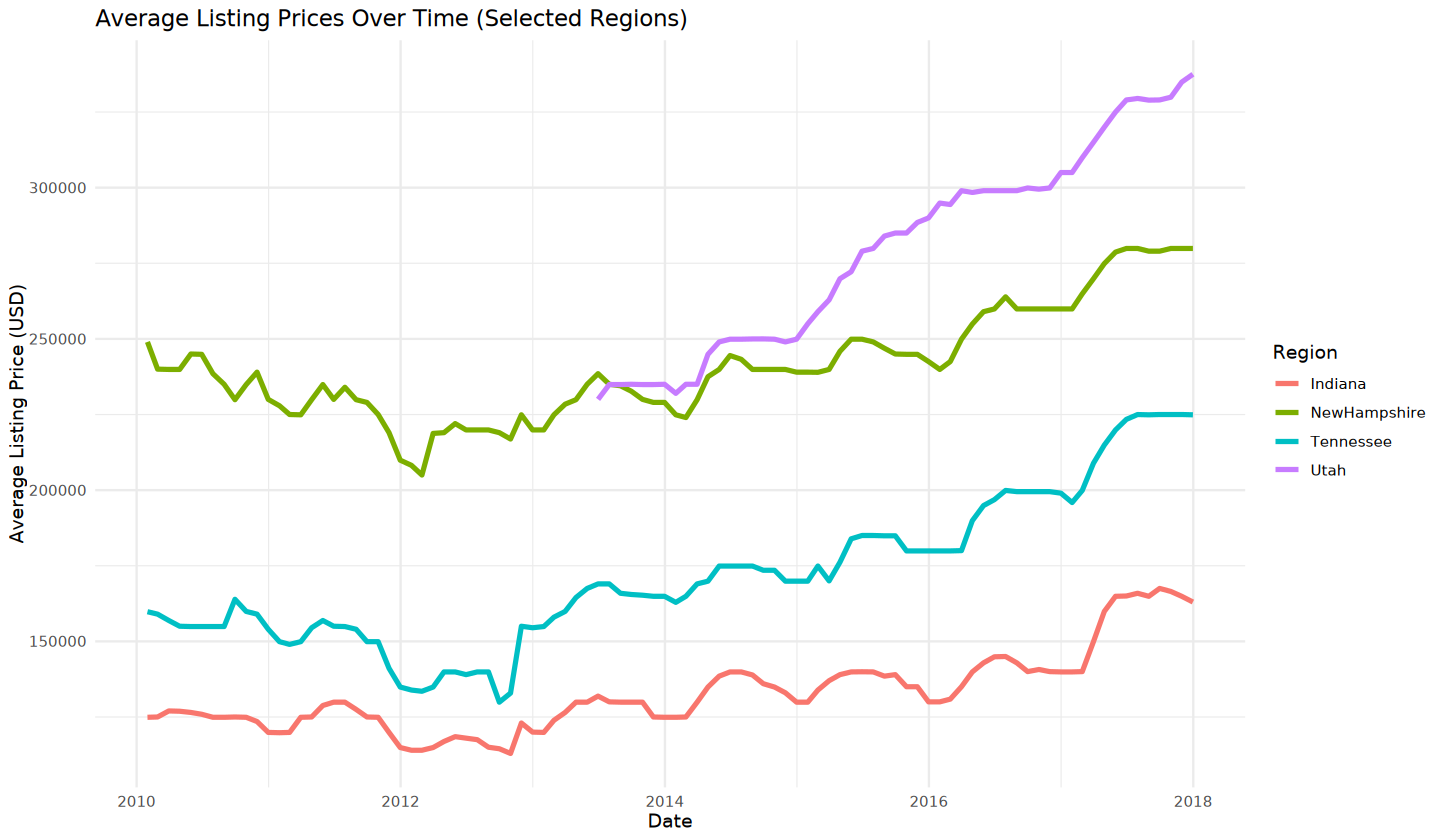

In [356]:
options(repr.plot.width = 12, repr.plot.height = 7)

p <- ggplot(zillow_grouped_small,
            aes(x = Date, y = avg_price, color = RegionName, group = RegionName)) +
  geom_line(linewidth = 1.1) +
  labs(title = "Average Listing Prices Over Time (Selected Regions)",
       x = "Date",
       y = "Average Listing Price (USD)",
       color = "Region") +
  theme_minimal()

p

In [361]:
more_selected_regions <- c("California", "Delaware", "Florida", "Alaska")
more_selected_regions

[1] "California" "Delaware"   "Florida"    "Alaska"

In [367]:
zillow_grouped_extra <- z_state_clean %>%
  filter(RegionName %in% more_selected_regions) %>%
  group_by(Date, RegionName) %>%
  summarise(avg_price = mean(MedianListingPrice_AllHomes), .groups = "drop")
head(zillow_grouped_extra)

Date,RegionName,avg_price
<date>,<chr>,<dbl>
2010-01-31,Alaska,239900
2010-01-31,Delaware,234900
2010-02-28,Alaska,241250
2010-02-28,Delaware,232900
2010-03-31,Alaska,248000
2010-03-31,Delaware,230000


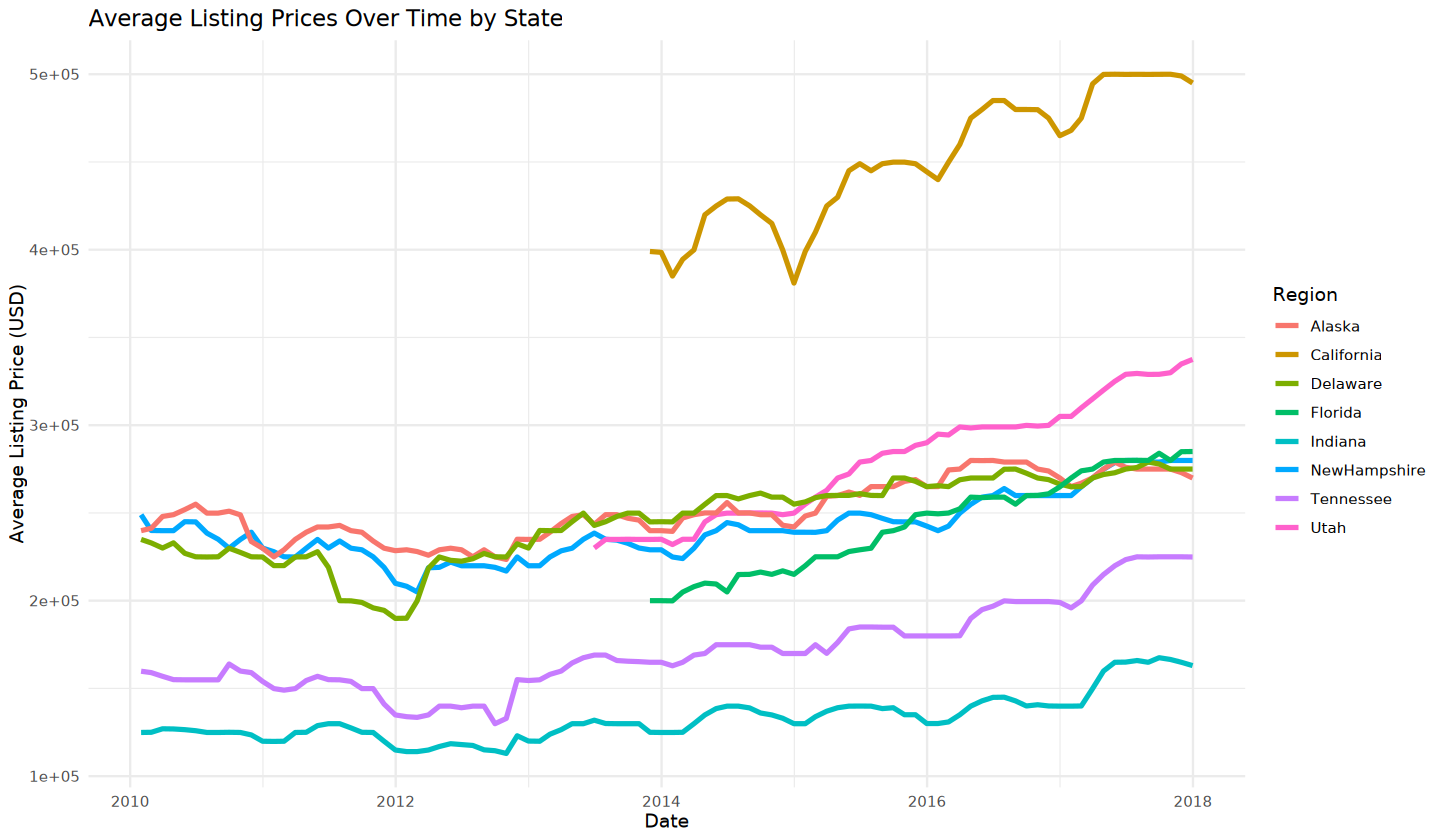

In [375]:
p2 <- ggplot() +
  geom_line(data = zillow_grouped_small,
            aes(x = Date, y = avg_price, color = RegionName, group = RegionName),
            linewidth = 1.1) +
  geom_line(data = zillow_grouped_extra,
            aes(x = Date, y = avg_price, color = RegionName, group = RegionName),
            linewidth = 1.1) +
  labs(title = "Average Listing Prices Over Time by State",
       x = "Date",
       y = "Average Listing Price (USD)",
       color = "Region") +
  theme_minimal()

p2

The compound plot reveals positive price disparities in the states with California and Florida always trending much higher than the rest. The upward trend in all states ensures a gradual increase in home values. Smaller markets like Delaware and Alaska are more jagged due to less transactions meaning that the averages are more sensitive to the short-term variations.



## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
